In [4]:
#Load modular polynomials
from sage.modular.ssmod.ssmod import Phi_polys
load("graph_functions.sage")

# This function computes the spine of a directed l-isogeny graph.
# INPUT: primes p, l, (optional) number of steps.
# OUTPUT: The spine and the Fp-bar isogeny graph.
def directedSpineGraph(p, l, steps = oo):
    D = build_isogeny_graph_over_Fpbar(p, l,steps)
    G = build_spine(p, l, D, steps = oo)
    return G, D

# Diameter Distribution
def compDiameterDistribution(spine):
    components = spine.connected_components_subgraphs()
    diameterList = []
    for G in components:
        diam = G.diameter()
        if type(diam) == sage.rings.infinity.PlusInfinity:
            diam = 0
        diameterList.append(diam)
    meanOfList = mean(diameterList)
    medianOfList = median(diameterList)
    modeOfList = mode(diameterList)[0]
    return diameterList, meanOfList, medianOfList, modeOfList

def fullDiameterNumber(spine):
    if spine.is_connected():
        diam = spine.diameter()
    else:
        components = spine.connected_components_subgraphs()
        diameterList = []
        for G in components:
            diameterList.append(G.diameter())
        diam = mean(diameterList)
    return diam

For how many primes p>13 would you like to compute data?  200


Distribution of the Mean of diameters of the components for p congruent to 7 mod 8:


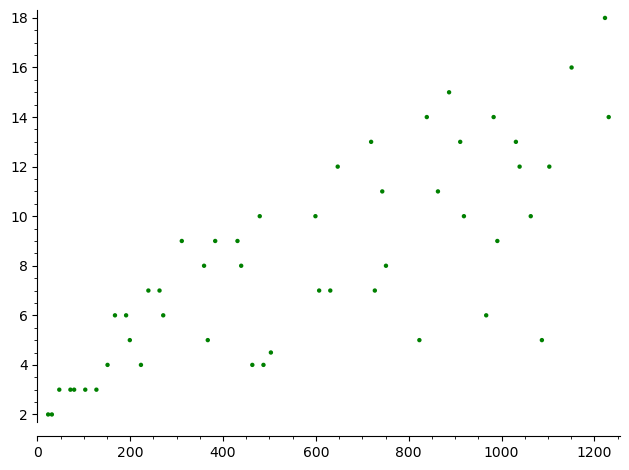

In [6]:
# Now we actually use all the functions
seq = int(input("For how many primes p>13 would you like to compute data? "))
ell = 2
counter = 0
allData = []
allData.append(("prime", "compDiamData", "fullDiamData"))
# allData2.append(("prime", "compGirthData", "fullGirthData"))
p = next_prime(13)
while counter<seq:
    graphs = directedSpineGraph(p,ell)
    fullIsogGraph = graphs[1]
    spine = graphs[0]
    compDiamData = compDiameterDistribution(spine)
    fullDiamData = fullDiameterNumber(spine)
    allData.append((p, compDiamData, fullDiamData))
    counter += 1
    p = next_prime(p)
    if counter == seq:
        break
import csv
def puttingDataIntoCsvFile(data):
    myList = data
    myNewList = []
    for i in range(len(myList)):
        if type(myList[i]) == type([]) or type(myList[i]) == type(()):
            myNewNewList = []
            for j in range(len(myList[i])):
                myNewNewList.append(str(myList[i][j]))
            myNewList.append((myNewNewList))
        else:
            myNewList.append(str(myList[i]))
    with open('diameter_data.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerows(myNewList)
puttingDataIntoCsvFile(allData)


# FULL DATA:

# Graphs:

# compDiam Graphs:
#print("Distribution of the Mean of diameters of the components:")
#R = sage.plot.point.point2d([allData[n][0], allData[n][1][1]] for n in range(1, seq+1))
#R.show()
#print("Distribution of the Median of diameters of the components:")
#S = sage.plot.point.point2d([allData[n][0], allData[n][1][2]] for n in range(1, seq+1))
#S.show()
#print("Distribution of the Mode of diameters of the components:")
#T = sage.plot.point.point2d([allData[n][0], allData[n][1][3]] for n in range(1, seq+1))
#T.show()
# fullDiam Graph:
#print("Distribution of the diameter of the Spine:")
#U = sage.plot.point.point2d([allData[n][0], allData[n][2]] for n in range(1, seq+1))
#U.show()

# P CONGRUENT TO 1 MOD 4:

#print("Distribution of the Mean of diameters of the components for p congruent to 1 mod 4:")
#oR = sage.plot.point.point2d([[allData[n][0], allData[n][1][1]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
#oR.show()
#print("Distribution of the Median of diameters of the components for p congruent to 1 mod 4:")
#oS = sage.plot.point.point2d([[allData[n][0], allData[n][1][2]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
#oS.show()
#print("Distribution of the Mode of diameters of the components for p congruent to 1 mod 4:")
#oT = sage.plot.point.point2d([[allData[n][0], allData[n][1][3]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
#oT.show()
# fullDiam Graph:
#print("Distribution of the diameter of the Spine for p congruent to 1 mod 4:")
#oU = sage.plot.point.point2d([[allData[n][0], allData[n][2]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
#oU.show()

# P CONGRUENT TO 7 MOD 8:

print("Distribution of the Mean of diameters of the components for p congruent to 7 mod 8:")
sR = sage.plot.point.point2d([[allData[n][0], allData[n][1][1]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
sR.show()
#print("Distribution of the Median of diameters of the components for p congruent to 7 mod 8:")
#sS = sage.plot.point.point2d([[allData[n][0], allData[n][1][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
#sS.show()
#print("Distribution of the Mode of diameters of the components for p congruent to 7 mod 8:")
#sT = sage.plot.point.point2d([[allData[n][0], allData[n][1][3]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
#sT.show()
# fullDiam Graph:
#print("Distribution of the diameter of the Spine for p congruent to 7 mod 8:")
#sU = sage.plot.point.point2d([[allData[n][0], allData[n][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
#sU.show()

# P CONGRUENT TO 3 MOD 8:

#print("Distribution of the Mean of diameters of the components for p congruent to 3 mod 8:")
#tR = sage.plot.point.point2d([[allData[n][0], allData[n][1][1]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
#tR.show()
#print("Distribution of the Median of diameters of the components for p congruent to 3 mod 8:")
#tS = sage.plot.point.point2d([[allData[n][0], allData[n][1][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
#tS.show()
#print("Distribution of the Mode of diameters of the components for p congruent to 3 mod 8:")
#tT = sage.plot.point.point2d([[allData[n][0], allData[n][1][3]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
#tT.show()
# fullDiam Graph:
#print("Distribution of the diameter of the Spine for p congruent to 3 mod 8:")
#tU = sage.plot.point.point2d([[allData[n][0], allData[n][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
#tU.show()

# FULL DATA WITH DISTINCTION:

#print("Distribution of the Mean of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
#wR = oR + sR + tR
#wR.show()
#print("Distribution of the Median of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
#wS = oS + sS + tS
#wS.show()
#print("Distribution of the Mode of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
#wT = oT + sT + tT
#wT.show()
# fullDiam Graph:
#print("Distribution of the diameter of the Spine where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
#wU = oU + sU + tU
#wU.show()


In [11]:
MAX = 250
p7mod8_spine_diam = []
p = 13
while len(p7mod8_spine_diam)< MAX:
    if p.mod(8) == 7:
        SPINE = directedSpineGraph(p,2)
        p7mod8_spine_diam.append([p,fullDiameterNumber(SPINE[0])])
    p = next_prime(p)

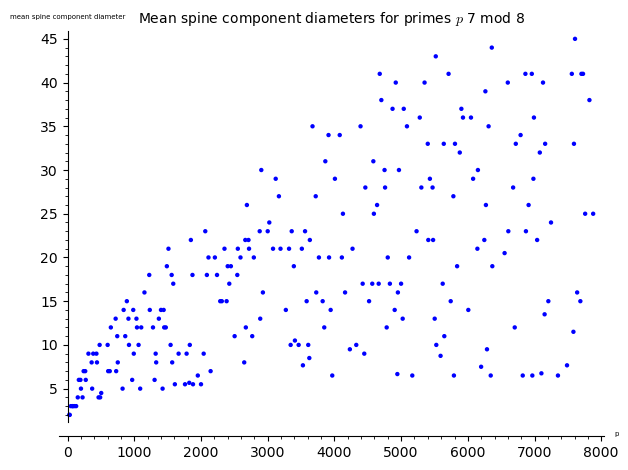

In [24]:
list_plot(p7mod8_spine_diam,title = "Mean spine component diameters for primes $p$ 7 mod 8", axes_labels = ['p', 'mean spine component diameter'],axes_labels_size=.5).show()

In [17]:
p7mod8_spine_diam

[[23, 2],
 [31, 2],
 [47, 3],
 [71, 3],
 [79, 3],
 [103, 3],
 [127, 3],
 [151, 4],
 [167, 6],
 [191, 6],
 [199, 5],
 [223, 4],
 [239, 7],
 [263, 7],
 [271, 6],
 [311, 9],
 [359, 8],
 [367, 5],
 [383, 9],
 [431, 9],
 [439, 8],
 [463, 4],
 [479, 10],
 [487, 4],
 [503, 9/2],
 [599, 10],
 [607, 7],
 [631, 7],
 [647, 12],
 [719, 13],
 [727, 7],
 [743, 11],
 [751, 8],
 [823, 5],
 [839, 14],
 [863, 11],
 [887, 15],
 [911, 13],
 [919, 10],
 [967, 6],
 [983, 14],
 [991, 9],
 [1031, 13],
 [1039, 12],
 [1063, 10],
 [1087, 5],
 [1103, 12],
 [1151, 16],
 [1223, 18],
 [1231, 14],
 [1279, 12],
 [1303, 6],
 [1319, 9],
 [1327, 8],
 [1367, 13],
 [1399, 14],
 [1423, 5],
 [1439, 14],
 [1447, 12],
 [1471, 12],
 [1487, 19],
 [1511, 21],
 [1543, 10],
 [1559, 18],
 [1567, 8],
 [1583, 17],
 [1607, 11/2],
 [1663, 9],
 [1759, 11/2],
 [1783, 9],
 [1823, 17/3],
 [1831, 10],
 [1847, 22],
 [1871, 18],
 [1879, 11/2],
 [1951, 13/2],
 [1999, 11/2],
 [2039, 9],
 [2063, 23],
 [2087, 18],
 [2111, 20],
 [2143, 7],
 [2207, 